# Candidate embauche Analysis (François Biller)

##### Code et analyse faits sur le Test de Quantmetry avec comme source le tutoriel et le code :
##### https://github.com/IBM/watson-studio-learning-path-assets/blob/master/notebooks/customer-churn-kaggle.ipynb

In [1]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json
import time

##### Ouverture du fichier dans un dataframe

In [3]:
df = pd.read_csv("/Users/francois/desktop/PythonCode/Quantmetry/CODE_PY_FBILLER/data.csv")
print ("Nombre de Lignes et de colonnes ",df.shape)

Nombre de Lignes et de colonnes  (20000, 13)


In [4]:
df.head(10)

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
6,6,6,2013-11-11,brun,33.0,12.0,39476.0,M,master,geologie,50.20,oui,0
7,7,7,2012-03-10,roux,31.0,10.0,42392.0,M,licence,forage,62.20,oui,0
8,8,8,2014-10-17,chatain,43.0,10.0,28625.0,M,doctorat,geologie,65.17,non,1
9,9,9,2011-06-04,chatain,28.0,11.0,32454.0,M,master,forage,66.93,non,1


##### Bar Chart des embauches

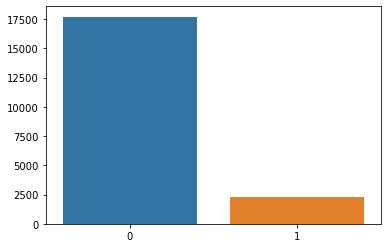

In [5]:
y = df["embauche"].value_counts()
sns.barplot(y.index, y.values)

#### Rejet des lignes commportant des cellules vides

In [6]:
df.dropna(inplace=True)

#### Recherche des valeurs incohérentes

In [7]:
 df.describe()

,Unnamed: 0,index,age,exp,salaire,note,embauche
count,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000
mean,9993.008990,9993.008990,34.998791,9.496662,34966.878713,75.184446,0.114558
std,5771.344205,5771.344205,9.606263,3.012915,5005.208499,17.112102,0.318496
min,0.000000,0.000000,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,4986.000000,4986.000000,29.000000,7.000000,31593.000000,63.730000,0.000000
50%,9989.000000,9989.000000,35.000000,9.000000,34968.000000,75.110000,0.000000
75%,14993.000000,14993.000000,41.000000,12.000000,38353.000000,86.670000,0.000000
max,19999.000000,19999.000000,72.000000,23.000000,53977.000000,143.220000,1.000000


#### Rejet des lignes comportant des valeurs incohérentes

In [8]:
print ("Rejet des lignes comportant des valeur incohérentes")
df = df[df.age > 0]
df = df[df.exp > 0]

Rejet des lignes comportant des valeur incohérentes


#### transformation des variable catégorielle en bouleen

In [9]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# sexe, diplome, specialité and dispo are strings and we want discreet integer values
df['sexe'] = label_encoder.fit_transform(df['sexe'])
df['diplome'] = label_encoder.fit_transform(df['diplome'])
df['specialite'] = label_encoder.fit_transform(df['specialite'])
df['dispo'] = label_encoder.fit_transform(df['dispo'])

##### Nous avons bien que des types float ou integer dans le dataframe

In [10]:
print (df.dtypes)
df.head()

Unnamed: 0      int64
index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe            int64
diplome         int64
specialite      int64
note          float64
dispo           int64
embauche        int64
dtype: object


,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,0,2,3,97.08,0,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,1,2,2,63.86,0,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,1,2,3,78.50,0,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,0,2,1,81.91,0,0
5,5,5,2014-02-12,chatain,37.0,8.0,38558.0,1,3,3,63.46,0,1


#### création du vecteur de résultat

In [11]:
y = df['embauche'].values.astype(np.int)

#### Rejet des colonnes superflues 

In [12]:
df=df.drop(df.columns[[0]],axis='columns')
df.drop(["index","date","cheveux","embauche"], axis = 1, inplace=True)

##### Vérification dataframe final input

In [13]:
df.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,25.0,9.0,26803.0,0,2,3,97.08,0
1,35.0,13.0,38166.0,1,2,2,63.86,0
2,29.0,13.0,35207.0,1,2,3,78.50,0
4,35.0,6.0,28533.0,0,2,1,81.91,0
5,37.0,8.0,38558.0,1,3,3,63.46,0


#### toutes les valeurs du dataframe sont des rééls

In [14]:
X = df.values.astype(np.float)

#### Mise à l'échelle des caractéristiques pour une mise à niveau des données

###### Comme de nombreux éléments utilisés dans les fonction objectives d'un algorithme d'apprentissage (comme le noyau RBF du SVM ou les régularisateurs L1 et L2 des modèles linéaires) supposent que toutes les caractéristiques soient centrées autour de 0 et ont une variance du même ordre, il est nécessaire de normaliser (remettre à l’échelle) l’ensemble des données en les re-calculant avec une moyenne nulle et un ecart type de 1.
##### Avec StandardScaler(), cette technique part du principe que les données sont normalement distribuées.

In [15]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

###### Nous devons adopter la validation croisée stratifiée (« stratified cross validation »), car les valeurs de réponse ne sont pas équilibrées. La validation croisée va nous permettre de diviser le jeu de données en k parties (folds en anglais) tour à tour utilisée pour l’entraînement et pour la validation. Et pour éviter d'introduire des biais dans le cas d'une classification il est nécessaire de sratitifier la validation croisée. On s’efforce de créer les k folds de sorte à ce qu’elles contiennent à peu près les mêmes proportions d’exemples de chaque classe que le jeu de données complet, et éviter qu'un jeu d'entrainement ne contiennent que des exemples positifs et que le jeux de tests le contraire (source https://j.mp/3kAjedo)


In [16]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred


#### Définition d'une classe timer pour calculer le temps d'exécution d'un calcul


###### Déterminer le meilleur algorithme sur la base de ses performances de précision, doit-être rapporté au temps de calcul nécessaire à l'apprentissage. Nous utiliserons un interval timer pour calculer le temps de calcul entre 2 appels à cette class Timer

In [17]:
class Timer(object):
    def __enter__(self):
        self.start()
        # __enter__ must return an instance bound with the "as" keyword
        return self

    # There are other arguments to __exit__ but we don't care here
    def __exit__(self, *args, **kwargs):
        self.stop()

    def start(self):
        if hasattr(self, 'interval'):
            del self.interval
        self.start_time = time.time()

    def stop(self):
        if hasattr(self, 'start_time'):
            self.interval = round(time.time() - self.start_time,2)
            del self.start_time # Force timer reinit


#### Gradient Boosting Classifier

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     16813
           1       0.81      0.16      0.27      2178

    accuracy                           0.90     18991
   macro avg       0.86      0.58      0.61     18991
weighted avg       0.89      0.90      0.87     18991


Temps de calcul 34.2


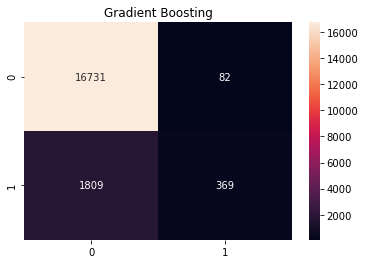

In [18]:
with Timer() as timer:
    from sklearn.ensemble import GradientBoostingClassifier
    gradient_boost = GradientBoostingClassifier()
    #print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
    grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
    title = 'Gradient Boosting'
    plt.title(title);
    print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print ('Temps de calcul',timer.interval)

#### Support vector machine

Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16813
           1       0.87      0.20      0.33      2178

    accuracy                           0.90     18991
   macro avg       0.89      0.60      0.64     18991
weighted avg       0.90      0.90      0.88     18991


Temps de calcul 63.68


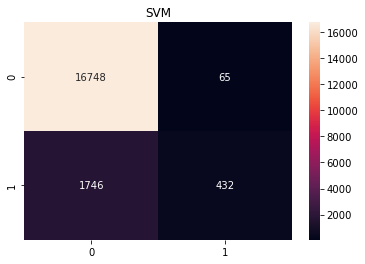

In [19]:
with Timer() as timer:
    from sklearn.svm import SVC
    svc_model = SVC(gamma='auto')
    #print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
    svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
    sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
    title = 'SVM'
    plt.title(title);
    print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print ('Temps de calcul',timer.interval)

#### Random Forest Classifier

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     16813
           1       0.71      0.28      0.40      2178

    accuracy                           0.90     18991
   macro avg       0.81      0.63      0.67     18991
weighted avg       0.89      0.90      0.89     18991


Temps de calcul 3.06


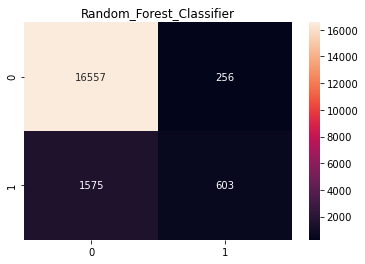

In [20]:
with Timer() as timer:
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=10)
    #print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
    Random_Forest_Classifier_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
    sns.heatmap(Random_Forest_Classifier_matrix, annot=True,  fmt='');
    title = 'Random_Forest_Classifier'
    plt.title(title);
    print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))
print ('Temps de calcul',timer.interval)

#### KNeighbors Classifier

K_Neighbor_Classifier:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     16813
           1       0.63      0.32      0.42      2178

    accuracy                           0.90     18991
   macro avg       0.77      0.65      0.68     18991
weighted avg       0.88      0.90      0.89     18991


Temps de calcul 2.17


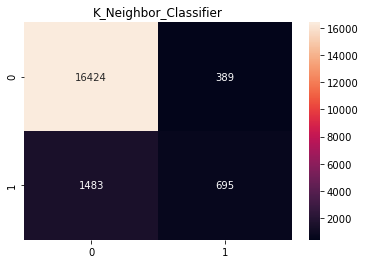

In [21]:
with Timer() as timer:
    from sklearn.neighbors import KNeighborsClassifier
    k_neighbors = KNeighborsClassifier()
    #print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
    K_Neighbor_Class_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, k_neighbors))
    sns.heatmap(K_Neighbor_Class_matrix, annot=True,  fmt='');
    title = 'K_Neighbor_Classifier'
    plt.title(title);
    print('K_Neighbor_Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, k_neighbors))))
print ('Temps de calcul',timer.interval)

##### Nous choisirons ce modèle d'apprentissage qui a de bonnes performances au regard du temps d'entraintement (2s) par rapport au SVM ou GBoosting 30x plus rapide !
##### La Précision (des prédictions positives) est de 0,63 pour prédire une embauche.
##### Le Rappel (sensibilité ou taux de positif réel) : Fraction des embauchés qui ont été correctement prédit est faible 0,32.
##### Le score F1 est la moyenne pondérée de la précision et du rappel qui tient donc compte à la fois des faux positifs et des faux négatifs. F1 est généralement plus utile que la précision, surtout si la distribution des classes est inégale. La précision fonctionne mieux si les faux positifs et les faux négatifs ont un coût similaire. Si le coût des faux positifs et des faux négatifs est très différent, il est préférable d'examiner à la fois la précision et le rappel. Dans notre cas, le score F1 est de 0,90

#### Logistic Regression

Logistic Regression:           0.89
Temps de calcul 0.4


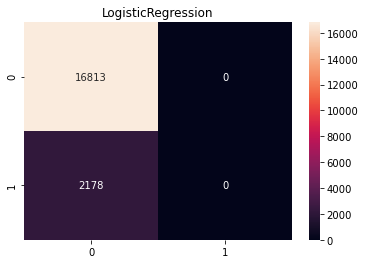

In [22]:
with Timer() as timer:
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs')
    print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))
    LogisticRegression_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, logistic_regression))
    sns.heatmap(LogisticRegression_conf_matrix, annot=True,  fmt='');
    title = 'LogisticRegression'
    plt.title(title);
print ('Temps de calcul',timer.interval)

#### Final Model Selection

In [23]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[0.00888221 0.00326827 0.08191484 0.21815059 0.12470476 0.16183075
 0.20310161 0.19814696]
sexe          0.218151
note          0.203102
dispo         0.198147
specialite    0.161831
diplome       0.124705
salaire       0.081915
age           0.008882
exp           0.003268
dtype: float64


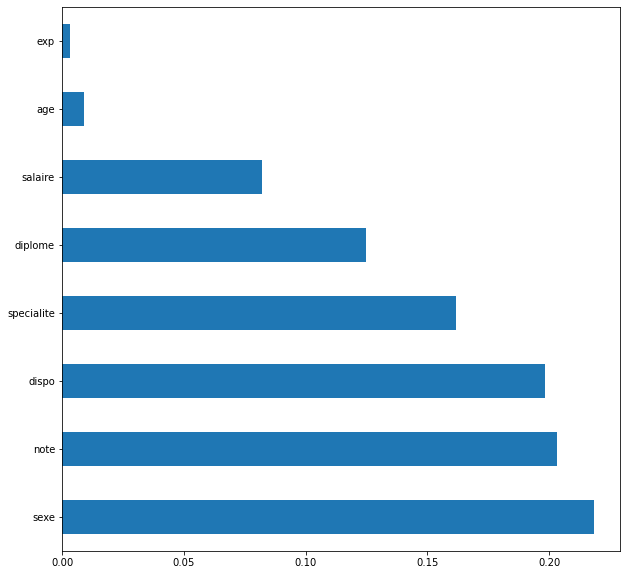

In [24]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))
print(feat_importances)


##### Dans le modèle Gradient Booster, les caractéristiques qui sont les plus importantes sont le sexe, la note, la disponibilité et la disponibilité